***Unsupervised Learning***

## **Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

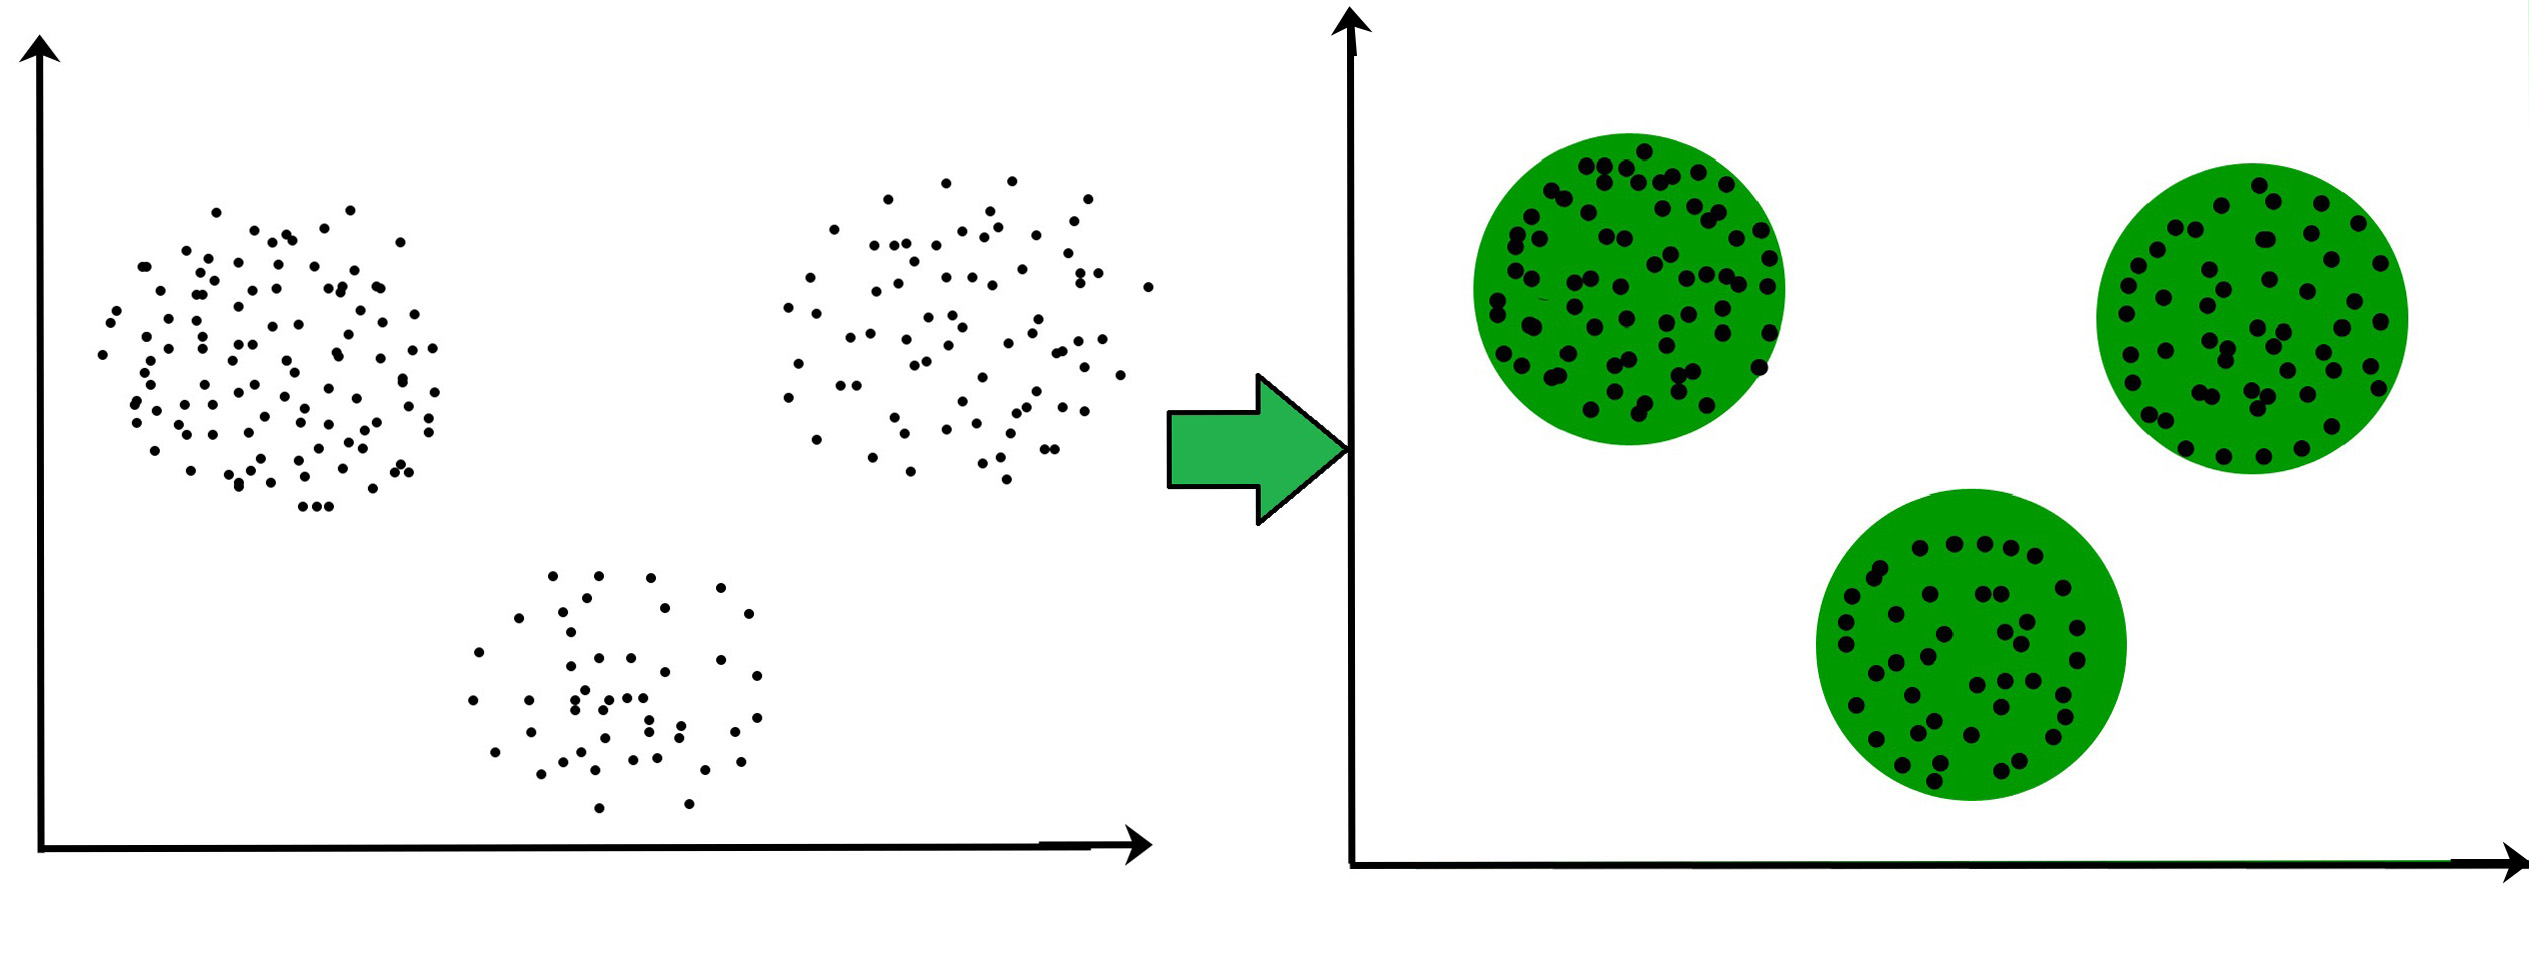

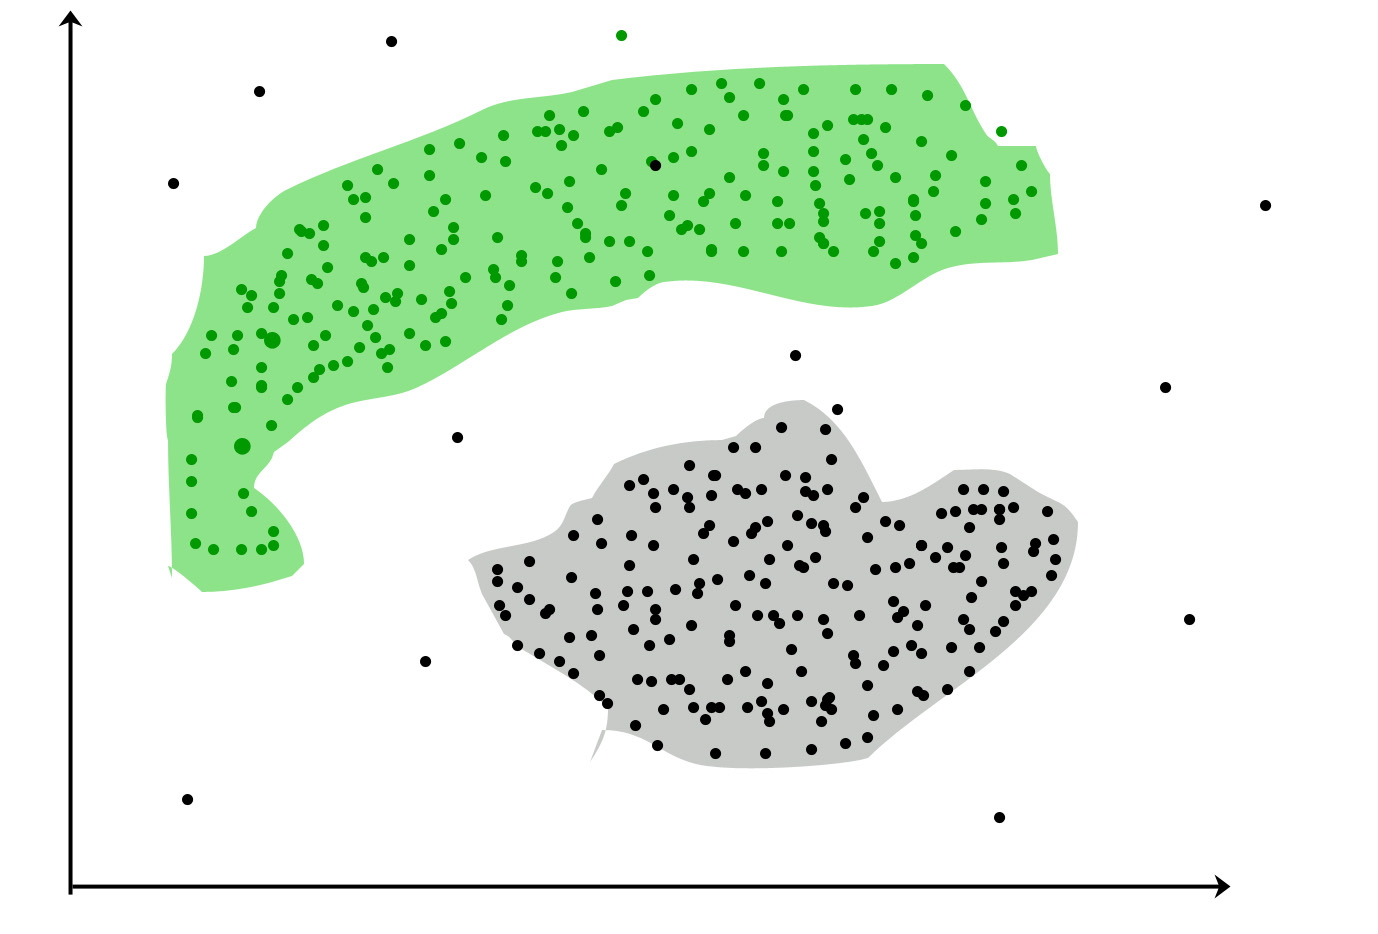


## **K Means Clustering**

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [44]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections #For fetching dictionary of labels & clusters
import nltk #Natural Language Toolkit
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize #Word tokenization is the process of splitting a large sample of text into words.
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer #Normalizing Sentences
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

[nltk_data] Downloading package stopwords to /home/nsl47/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nsl47/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# My Dataset contains multiple sentences related to
# Graphics, Snooker, Investment, Software Engineering, Artificial Intelligence, Aviation & Love

sentences = pd.read_csv("Quotes.csv")
sentences

,Quotes
0,Graphics designers are most creative people
1,Artificial Intelligence or AI is the last inve...
2,Snooker is a billiards sport for normally two ...
3,Snooker is played on a large (12 feet by 6 fee...
4,FOREX is the stock market for trading currencies
5,Software Engineering is hotter and hotter topi...
6,Love is blind
7,Snooker is popular in the United Kingdom and m...
8,The flying or operating of aircraft is known a...
9,AI is likely to be either the best or worst th...


In [47]:
# Converting our datalist into list

sentences_list = sentences["Quotes"].tolist()

In [48]:
sentences_list

['Graphics designers are most creative people',
 'Artificial Intelligence or AI is the last invention - humans could ever make',
 'Snooker is a billiards sport for normally two players.',
 'Snooker is played on a large (12 feet by 6 feet) table that is covered with a smooth green material.',
 'FOREX is the stock market for trading currencies',
 'Software Engineering is hotter and hotter topic in Silicon Valley',
 'Love is blind',
 'Snooker is popular in the United Kingdom and many other countries',
 'The flying or operating of aircraft is known as aviation.',
 'AI is likely to be either the best or worst thing happen to humanity',
 'Design is Intelligence made visible.',
 'Falling in love is like being on drugs.',
 'There is only one happiness in Life to Love and to be loved.',
 "Boeing 777 is considered world's largest economical plane in the world of Aviation.",
 'Warren Buffet is famous for making good investments.He knows stock markets',
 'The biggest of the many uses of aviation a

# Defining a function tokenizer(text)


In [52]:
def tokenizer(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    
    # Removing Morphhological axes
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens


## **Defining a function cluster_sentences(sentences,k=(int))**

#### **1. Training our K - Means Model**
#### **2. Creating tfidf Vectorizer Matrix**

In [57]:
def cluster_sentences(sentences_list,k):
    tfidf_vectorizer = TfidfVectorizer(tokenizer= tokenizer, stop_words = stopwords.words('english'),lowercase= True)
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_list)

  #builds a tf-idf matrix for the sentences
  #   Transforms text to feature vectors that can be used as input to estimator. 
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences_list)
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(tfidf_matrix)
    
    clusters = collections.defaultdict(list)
    
    for i ,label in enumerate(kmeans.labels_):
        clusters[label].append(i)
    return dict(clusters)
        
    

## **Testing our Model**

In [58]:
from nltk.corpus import stopwords

k = 7
clusters = cluster_sentences(sentences_list,k)
for cluster in range (k):
  print("\nCLUSTER ",cluster,":\n")
  for i, sentence in enumerate(clusters[cluster]):
    print("\t",(i+1),": ",sentences_list[sentence])


CLUSTER  0 :

	 1 :  Graphics designers are most creative people
	 2 :  Design is Intelligence made visible.
	 3 :  Graphics Designing is high rated freelance subject

CLUSTER  1 :

	 1 :  Snooker is popular in the United Kingdom and many other countries
	 2 :  The flying or operating of aircraft is known as aviation.
	 3 :  Boeing 777 is considered world's largest economical plane in the world of Aviation.
	 4 :  The biggest of the many uses of aviation are in air travel and military aircraft.
	 5 :  Aviation refers to flying using an aircraft like an aeroplane.
	 6 :  Auomation is the biggest blessing given by Artificial Inteligence.

CLUSTER  2 :

	 1 :  Love is blind
	 2 :  Falling in love is like being on drugs.
	 3 :  There is only one happiness in Life to Love and to be loved.
	 4 :  Being in love is the number one reason why people wed.
	 5 :  Loving from a long distance actually strengthens a relationship
	 6 :  Real love is able to awaken your soul.

CLUSTER  3 :

	 1 :  Sof

/home/nsl47/anaconda3/envs/bd/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(
